In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install fastf1

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import fastf1
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy import stats
#--
import fastf1

fastf1.Cache.enable_cache('f1_cache')

#2
session = fastf1.get_session(2023, 'Monza', 'R')
session.load()

core           INFO 	Loading data for Italian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WAR

In [2]:
laps = session.laps
laps.head()
laps.columns


Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [3]:
# Import the modules
from preprocessing import preprocess_laps
from validate_preprocessing import validate_preprocessing, plot_preprocessing_diagnostics
# Save original data for comparison (optional but recommended)
original_laps = laps.copy()
# Run preprocessing
laps = preprocess_laps(laps)

Step 1: Handling missing values
  Removed 10 rows

Step 2: Removing outliers
  Removed 15 outliers, preserved 51 pit laps

Step 3: Converting timedelta to seconds
  Converted 3 columns

Step 4: Encoding categorical variables
  Created 21 features

Step 5: Scaling features
  Scaled 5 features

Preprocessing complete
Final dataset: 933 laps, 61 features
                    Time Driver DriverNumber                LapTime  \
0 0 days 01:23:49.780000    VER            1 0 days 00:01:27.905000   
1 0 days 01:25:15.943000    VER            1 0 days 00:01:26.163000   
2 0 days 01:26:41.645000    VER            1 0 days 00:01:25.702000   
3 0 days 01:28:07.695000    VER            1 0 days 00:01:26.050000   
4 0 days 01:29:33.871000    VER            1 0 days 00:01:26.176000   

   LapNumber  Stint PitOutTime PitInTime            Sector1Time  \
0        1.0    1.0        NaT       NaT                    NaT   
1        2.0    1.0        NaT       NaT 0 days 00:00:28.274000   
2        3.0    1.

DATA QUALITY VALIDATION REPORT

1. MISSING VALUES CHECK
------------------------------------------------------------
No missing values in critical columns

2. OUTLIER CHECK (LapTimeSeconds)
------------------------------------------------------------

3. TYPE CONVERSION CHECK
------------------------------------------------------------
All time columns converted to numeric (seconds)

4. CATEGORICAL ENCODING CHECK
------------------------------------------------------------
  Compound encoded features: 2
  Driver encoded features: 19
✓ Categorical variables encoded successfully

5. FEATURE SCALING CHECK
------------------------------------------------------------
  Scaled features: 5
✓ Scaling applied correctly (mean ≈ 0, std ≈ 1)

6. DATA DISTRIBUTION SUMMARY
------------------------------------------------------------
  Total laps: 933
  Total features: 61
  Unique drivers: 19
  Unique compounds: 2

  LapTimeSeconds statistics:
    Mean: 87.671s
    Median: 87.025s
    Std Dev: 3.538s

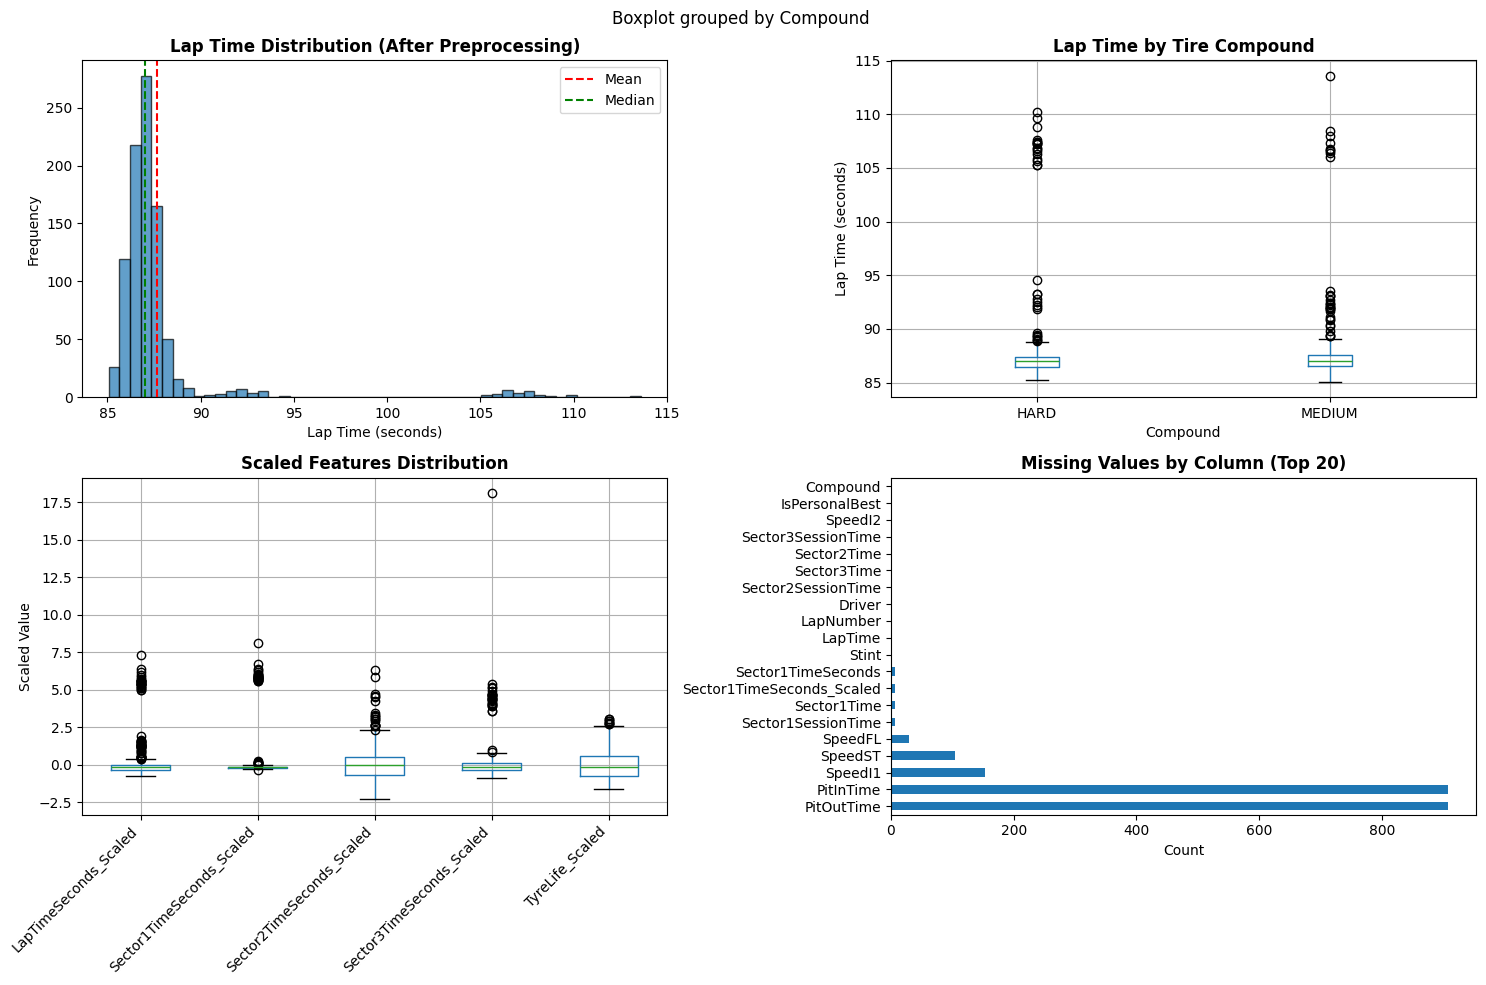

In [4]:
# Validate the preprocessed data
validation_results = validate_preprocessing(laps, original_laps)

# Show diagnostic plots
plot_preprocessing_diagnostics(laps)

Lap Time Distribution (Top Left): The small "bump" on the far right (105s+) proves that it successfully preserved the Pit Stops.

Tire Physics (Top Right): The "Medium" tire box is slightly lower (faster) than the "Hard" tire box. This confirms data reflects real-world physics.

Scaled Features (Bottom Left): All data is centered around 0. This means te normalization worked, which is critical for the stability.

Missing Values (Bottom Right): Drivers only pit once or twice a race; the empty values represent the 50+ laps of normal racing.

#Preparation and Logic

In [5]:
print(laps.head())

                    Time Driver DriverNumber                LapTime  \
0 0 days 01:23:49.780000    VER            1 0 days 00:01:27.905000   
1 0 days 01:25:15.943000    VER            1 0 days 00:01:26.163000   
2 0 days 01:26:41.645000    VER            1 0 days 00:01:25.702000   
3 0 days 01:28:07.695000    VER            1 0 days 00:01:26.050000   
4 0 days 01:29:33.871000    VER            1 0 days 00:01:26.176000   

   LapNumber  Stint PitOutTime PitInTime            Sector1Time  \
0        1.0    1.0        NaT       NaT                    NaT   
1        2.0    1.0        NaT       NaT 0 days 00:00:28.274000   
2        3.0    1.0        NaT       NaT 0 days 00:00:28.097000   
3        4.0    1.0        NaT       NaT 0 days 00:00:28.145000   
4        5.0    1.0        NaT       NaT 0 days 00:00:28.155000   

             Sector2Time  ... Driver_SAI Driver_SAR Driver_STR Driver_VER  \
0 0 days 00:00:29.666000  ...        0.0        0.0        0.0        1.0   
1 0 days 00:00:2

In [6]:
print(laps[['Driver', 'LapNumber', 'LapTime', 'TyreLife', 'Compound']].head(40))

   Driver  LapNumber                LapTime  TyreLife Compound
0     VER        1.0 0 days 00:01:27.905000       1.0   MEDIUM
1     VER        2.0 0 days 00:01:26.163000       2.0   MEDIUM
2     VER        3.0 0 days 00:01:25.702000       3.0   MEDIUM
3     VER        4.0 0 days 00:01:26.050000       4.0   MEDIUM
4     VER        5.0 0 days 00:01:26.176000       5.0   MEDIUM
5     VER        6.0 0 days 00:01:26.837000       6.0   MEDIUM
6     VER        7.0 0 days 00:01:26.368000       7.0   MEDIUM
7     VER        8.0 0 days 00:01:25.990000       8.0   MEDIUM
8     VER        9.0 0 days 00:01:26.605000       9.0   MEDIUM
9     VER       10.0 0 days 00:01:26.603000      10.0   MEDIUM
10    VER       11.0 0 days 00:01:26.643000      11.0   MEDIUM
11    VER       12.0 0 days 00:01:26.442000      12.0   MEDIUM
12    VER       13.0 0 days 00:01:26.666000      13.0   MEDIUM
13    VER       14.0 0 days 00:01:27.028000      14.0   MEDIUM
14    VER       15.0 0 days 00:01:26.782000      15.0  

In [7]:
'''
Calculating Pitloss
Here we compare green flag lap time vs the Pit in and out lap times
'''
# Filter for drivers who finished, doing this removes crash data (drivers who crashed during the race)
clean_laps = laps.pick_quicklaps() # Removes slow laps ( like Yellow flags)
avg_race_pace = clean_laps['LapTimeSeconds'].median()

In [8]:
#Identify Pit Laps
pit_laps = laps[laps['PitOutTime'].notna()] # Laps where they exited the pits
avg_pit_lap_time = pit_laps['LapTimeSeconds'].median()

In [10]:
# Estimating PIt loss
pit_loss = avg_pit_lap_time - avg_race_pace

print(f"Avg Race Pace: {avg_race_pace} seconds")

print(f"Avg Pit lap Time: {avg_pit_lap_time} seconds")

print(f"Estimated Pit loss: {pit_loss} seconds")

Avg Race Pace: 86.968 seconds
Avg Pit lap Time: 107.237 seconds
Estimated Pit loss: 20.26899999999999 seconds


# Modeling Tire Degradation (how much slower a car gets per lap)

In [11]:
#Making a tire degradation function
#Rival bot, Later, the goal is to beat this bot.

import random

class RaceParameters:
    base_lap_time = 87
    pit_loss = 21.00
def get_tire_degradation(tire_age, compound='medium'):
    if compound == 'soft':
        deg = 0.15 * tire_age
        if tire_age > 15: deg += 0.5 * (tire_age - 15)
    elif compound == 'medium':
        deg = 0.08 * tire_age
        if tire_age > 25: deg += 0.4 * (tire_age - 25)
    elif compound == 'hard':
        deg = 0.05 * tire_age
        if tire_age > 35: deg += 0.3 * (tire_age - 35)
    else:
        raise ValueError(f"Unknown compound: {compound}")
    return deg

class RivalBot:
    def __init__(self, pit_lap=24, start_tire='medium', switch_tire='hard'):
        self.pit_lap = pit_lap
        self.current_tire = start_tire
        self.switch_tire = switch_tire
        self.tire_age = 0

    def get_action(self, current_lap):
        if current_lap == self.pit_lap:
            self.current_tire = self.switch_tire
            self.tire_age = 0
            return 1  # Pit
        
        self.tire_age += 1
        return 0  # Stay Out


#Environment Design

In [1]:
%pip install gymnasium

   ---------------------------------------- 0.0/952.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/952.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/952.1 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/952.1 kB ? eta -:--:--
   ---------------------- ----------------- 524.3/952.1 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 952.1/952.1 kB 2.2 MB/s  0:00:00

   -------------------------- ------------- 2/3 [gymnasium]
   -------------------------- ------------- 2/3 [gymnasium]
   -------------------------- ------------- 2/3 [gymnasium]
   -------------------------- ------------- 2/3 [gymnasium]
   -------------------------- ------------- 2/3 [gymnasium]
   -------------------------- ------------- 2/3 [gymnasium]
   -------------------------- ------------- 2/3 [gymnasium]
   -------------------------- ------------- 2/3 [gymnasium]
   -------------------------- ------------- 2/3 [gymnasium]
   -------------

In [3]:
import gymnasium as gym
from gymnasium import spaces

In [ ]:
class F1PitStopEnv(gym.Env):
    metadata = {'render_modes': ['console']}
    def __init__(self):
        super(F1PitStopEnv, self).__init__()
        
        # Action Space: 
        # 0 = Stay out
        # 1 = Pit for Softs
        # 2 = Pit for Mediums
        # 3 = Pit for Hards
        self.action_space = spaces.Discrete(4)
        
        # State Space Box:
        # [Current Lap (0-1), Tire Age (0-1), Compound (0-2), Gap to Rival]
        # We normalize Lap and Tire Age by dividing by max laps (51) to help the NN learn faster.
        self.observation_space = spaces.Box(
            low=np.array([0.0, 0.0, 0.0, -np.inf]), 
            high=np.array([1.0, 1.0, 2.0, np.inf]), 
            dtype=np.float32
        )
        
        self.total_laps = 51
        self.pit_loss_seconds = 20.30
        
        self.rival_bot = None 
    def step(self, action):
        """
        Executes one lap of the race based on the agent's action.
        Must return: observation, reward, terminated, truncated, info
        """
        # TODO: Implement step logic (calculate lap time, update state, calculate reward)
        pass  
    def reset(self, seed=None, options=None):
        """
        Resets the environment to starting conditions (Lap 0, starting tires, etc.)
        Must return: observation, info
        """
        super().reset(seed=seed)
        
        # TODO: Implement reset logic (set initial state)
        pass  
    def render(self):
        """
        Optional: Print current state for debugging
        """
        pass